#  Ecommerce Company Project - P102-Group 3

# Imports

### Import pandas, numpy, matplotlib,and seaborn. 

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3AFB-53CA

 Directory of C:\Users\Soham\Documents\PythonCode\P102 Group3\06042022

04/06/2022  08:04 PM    <DIR>          .
04/06/2022  08:04 PM    <DIR>          ..
04/06/2022  06:16 PM    <DIR>          .ipynb_checkpoints
03/11/2022  04:07 AM            40,116 Ecommerce.csv
04/06/2022  07:35 PM         1,115,844 EcommerceProjectWithAdaBoostRegressor.ipynb
04/06/2022  05:45 PM         1,391,674 EcommerceProjectWithDecisionTreeRegressor.ipynb
04/06/2022  08:04 PM            30,473 EcommerceProjectWithLR.ipynb
03/31/2022  08:12 PM         2,442,221 EcommerceProjectWithMLR.ipynb
04/06/2022  06:09 PM         1,392,814 EcommerceProjectWithRandomForestRegressor.ipynb
04/06/2022  07:36 PM            25,940 Result summary.docx
               7 File(s)      6,439,082 bytes
               3 Dir(s)  163,167,854,592 bytes free


In [3]:
df = pd.read_csv("Ecommerce.csv")

# Exploratory Data Analysis

## Step 1 : Understanding Variables in the Dataset

In [4]:
df.shape

(623, 6)

In [5]:
df.dtypes

Customer ID               int64
Avg Session length      float64
Time on App             float64
Time on Website         float64
Length of MemberShip    float64
Yealy amount spent      float64
dtype: object

In [6]:
df.head(10)

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641
5,6,33.613701,13.129094,36.338622,5.053873,498.806136
6,7,34.426982,9.997738,38.315963,5.452814,272.641578
7,8,34.037318,11.939766,35.945398,4.615464,577.239205
8,9,31.976880,12.942695,37.000459,3.857096,535.667449
9,10,33.696003,12.488779,36.322443,1.965374,775.337626


In [7]:
df.columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent'],
      dtype='object')

In [8]:
df.nunique(axis=0)

Customer ID             623
Avg Session length      623
Time on App             623
Time on Website         623
Length of MemberShip    623
Yealy amount spent      623
dtype: int64

In [9]:
df.describe()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,312.000000,33.039429,12.001459,37.079018,3.514850,499.600023
std,179.988889,0.949071,0.996609,0.991753,0.948063,80.032965
min,1.000000,29.972300,9.273248,33.751071,0.891398,256.670000
25%,156.500000,32.375680,11.334163,36.376725,2.906558,447.665160
50%,312.000000,33.044399,11.998823,37.113631,3.504771,498.806136
75%,467.500000,33.700947,12.647695,37.773880,4.140305,551.257208
max,623.000000,35.744415,15.138317,40.808388,6.553916,775.337626


## Step 2: Cleaning Dataset

### Count of duplicated rows

In [10]:
df[df.duplicated()].shape

(0, 6)

### Removing rows with null values 

In [11]:
df=df.dropna(axis=0)
df.shape

(623, 6)

### Remove Redundant Variables 

In [12]:
df_cleaned=df.copy().drop(['Customer ID'],axis=1)

In [13]:
df_cleaned

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


### Rmoving Outliers

<AxesSubplot:>

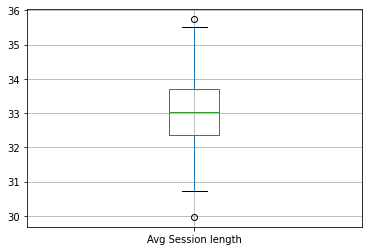

In [14]:
#boxplot 
df_cleaned.boxplot('Avg Session length')

In [15]:
Q1=df_cleaned['Avg Session length'].quantile(0.25)
Q3=df_cleaned['Avg Session length'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

32.375679865
33.700946785
1.3252669199999971
30.387779485000006 35.688847165


In [16]:
median = df_cleaned.loc[df_cleaned['Avg Session length'].between(Lower_Whisker,Upper_Whisker), 'Avg Session length'].median()
median
df_cleaned.loc[df_cleaned['Avg Session length'] > Upper_Whisker, 'Avg Session length'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Avg Session length'] <Lower_Whisker, 'Avg Session length'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned


,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


In [17]:
df_cleaned.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.040026,12.001459,37.079018,3.514850,499.600023
std,0.934798,0.996609,0.991753,0.948063,80.032965
min,30.716414,9.273248,33.751071,0.891398,256.670000
25%,32.376924,11.334163,36.376725,2.906558,447.665160
50%,33.044399,11.998823,37.113631,3.504771,498.806136
75%,33.695827,12.647695,37.773880,4.140305,551.257208
max,35.531879,15.138317,40.808388,6.553916,775.337626


<AxesSubplot:>

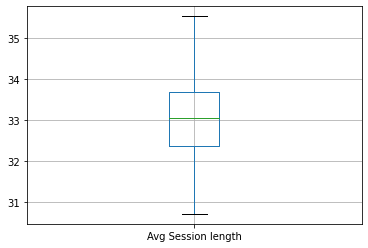

In [18]:
#boxplot 
df_cleaned.boxplot('Avg Session length')

<AxesSubplot:>

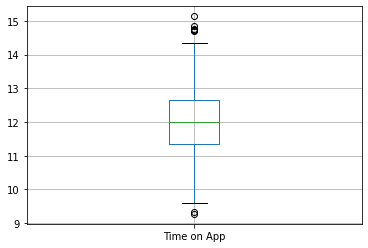

In [19]:
df_cleaned.boxplot('Time on App')

In [20]:
Q1=df_cleaned['Time on App'].quantile(0.25)
Q3=df_cleaned['Time on App'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

11.33416309
12.647694640000001
1.3135315500000004
9.363865765 14.617991965000002


In [21]:
median = df_cleaned.loc[df_cleaned['Time on App'].between(Lower_Whisker,Upper_Whisker), 'Time on App'].median()
median
df_cleaned.loc[df_cleaned['Time on App'] > Upper_Whisker, 'Time on App'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Time on App'] <Lower_Whisker, 'Time on App'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


<AxesSubplot:>

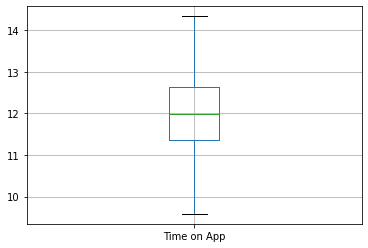

In [22]:
df_cleaned.boxplot('Time on App')

In [23]:
#Rmoving Outlier in Time on App Column
#df_cleaned=df_cleaned[df_cleaned['Time on App'].between(9.5,14.5)]
#boxplot 
#df_cleaned.boxplot('Time on App')

<AxesSubplot:>

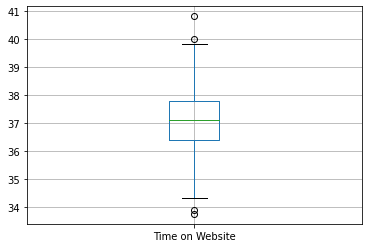

In [24]:
df_cleaned.boxplot('Time on Website')

In [25]:
Q1=df_cleaned['Time on Website'].quantile(0.25)
Q3=df_cleaned['Time on Website'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

36.376725300000004
37.773879969999996
1.397154669999992
34.280993295000016 39.869611974999984


In [26]:
median = df_cleaned.loc[df_cleaned['Time on Website'].between(Lower_Whisker,Upper_Whisker), 'Time on Website'].median()
median
df_cleaned.loc[df_cleaned['Time on Website'] > Upper_Whisker, 'Time on Website'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Time on Website'] <Lower_Whisker, 'Time on Website'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


<AxesSubplot:>

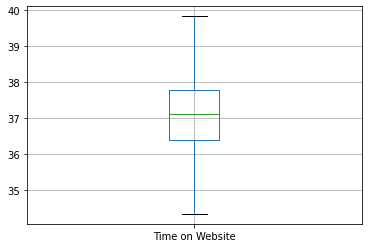

In [27]:
df_cleaned.boxplot('Time on Website')

In [28]:
#Rmoving Outlier in Time on Website Column
#df_cleaned=df_cleaned[df_cleaned['Time on Website'].between(34.2,39.99)]
#boxplot 
#df_cleaned.boxplot('Time on Website')


<AxesSubplot:>

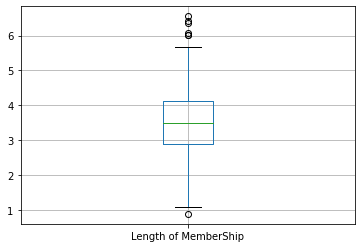

In [29]:
df_cleaned.boxplot('Length of MemberShip')

In [30]:
Q1=df_cleaned['Length of MemberShip'].quantile(0.25)
Q3=df_cleaned['Length of MemberShip'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.9065581075
4.140304663
1.2337465555000002
1.0559382742499996 5.990924496250001


In [31]:
median = df_cleaned.loc[df_cleaned['Length of MemberShip'].between(Lower_Whisker,Upper_Whisker), 'Length of MemberShip'].median()
print(median)
df_cleaned.loc[df_cleaned['Length of MemberShip'] > Upper_Whisker, 'Length of MemberShip'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Length of MemberShip'] <Lower_Whisker, 'Length of MemberShip'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned

3.4911241065


,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


<AxesSubplot:>

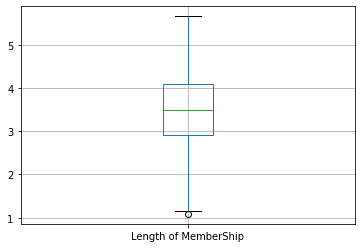

In [32]:
df_cleaned.boxplot('Length of MemberShip')

<AxesSubplot:>

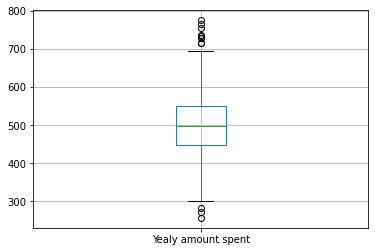

In [33]:
df_cleaned.boxplot('Yealy amount spent')

In [34]:
Q1=df_cleaned['Yealy amount spent'].quantile(0.25)
Q3=df_cleaned['Yealy amount spent'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

447.66516005
551.2572083
103.59204825
292.27708767499996 706.645280675


In [35]:
median = df_cleaned.loc[df_cleaned['Yealy amount spent'].between(Lower_Whisker,Upper_Whisker), 'Yealy amount spent'].median()
print(median)
df_cleaned.loc[df_cleaned['Yealy amount spent'] > Upper_Whisker, 'Yealy amount spent'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Yealy amount spent'] <Lower_Whisker, 'Yealy amount spent'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned

497.8097448


,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


<AxesSubplot:>

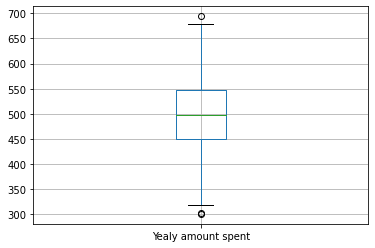

In [36]:
df_cleaned.boxplot('Yealy amount spent')

In [37]:
Q1=df_cleaned['Yealy amount spent'].quantile(0.25)
Q3=df_cleaned['Yealy amount spent'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

449.8512025
547.3374441999999
97.48624169999994
303.6218399500001 693.5668067499998


In [38]:
median = df_cleaned.loc[df_cleaned['Yealy amount spent'].between(Lower_Whisker,Upper_Whisker), 'Yealy amount spent'].median()
print(median)
df_cleaned.loc[df_cleaned['Yealy amount spent'] > Upper_Whisker, 'Yealy amount spent'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned.loc[df_cleaned['Yealy amount spent'] <Lower_Whisker, 'Yealy amount spent'] = np.nan
df_cleaned.fillna(median,inplace=True)
df_cleaned

497.8097448


,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


<AxesSubplot:>

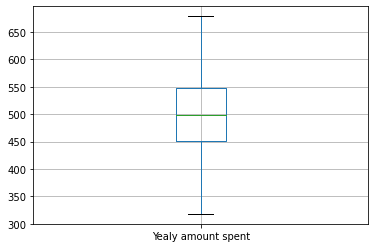

In [39]:
df_cleaned.boxplot('Yealy amount spent')

In [40]:
#Rmoving Outlier in Yealy amount spent Column
#df_cleaned=df_cleaned[df_cleaned['Yealy amount spent'].between(300,700)]
#boxplot 
#df_cleaned.boxplot('Yealy amount spent')

### Removing Rows with Null Values

In [41]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(623, 5)

## Step 3 : Analyzing Relationships between variables

### Use seaborn to create a jointplot 

In [42]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### Compare the Time on Website and Yearly Amount Spent columns. 

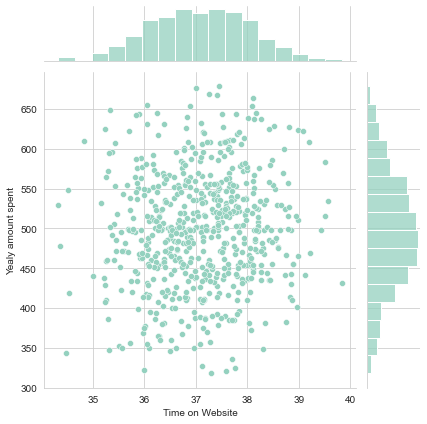

In [43]:
sns.jointplot(x = 'Time on Website', y = 'Yealy amount spent', data = df_cleaned)

### Compare the Time on App and Yearly Amount Spent columns.

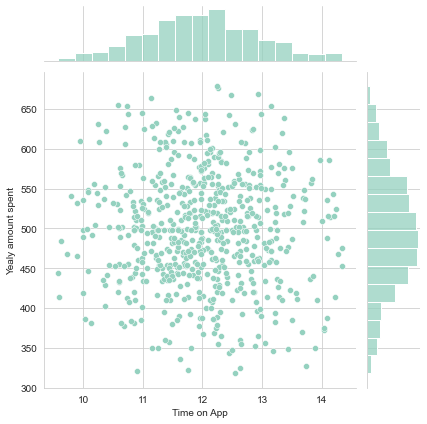

In [44]:
sns.jointplot(x = 'Time on App', y = 'Yealy amount spent', data = df_cleaned)

### Use jointplot to compare Time on App and Length of Membership.

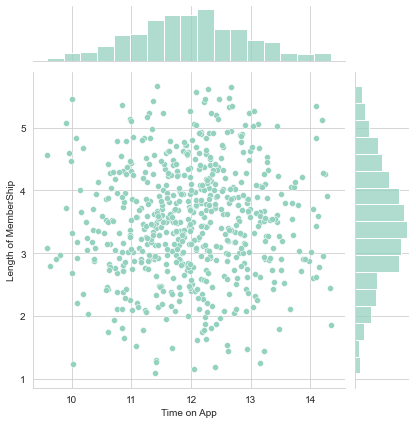

In [45]:
sns.jointplot(x = 'Time on App', y = 'Length of MemberShip', data = df_cleaned)

### Use jointplot to compare Time on Website and Length of Membership.

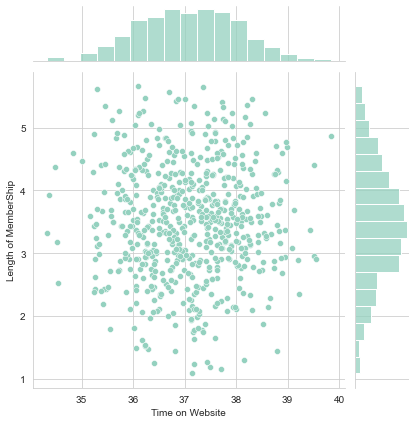

In [46]:
sns.jointplot(x = 'Time on Website', y = 'Length of MemberShip', data = df_cleaned)

### Correlation Matrix

<AxesSubplot:>

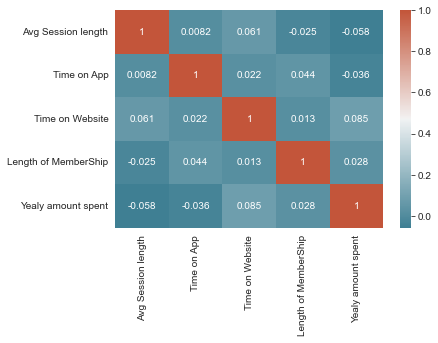

In [47]:
#Correlation Matrix
corr=df_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Pair Plot (Scatterplots Between All Variables.)

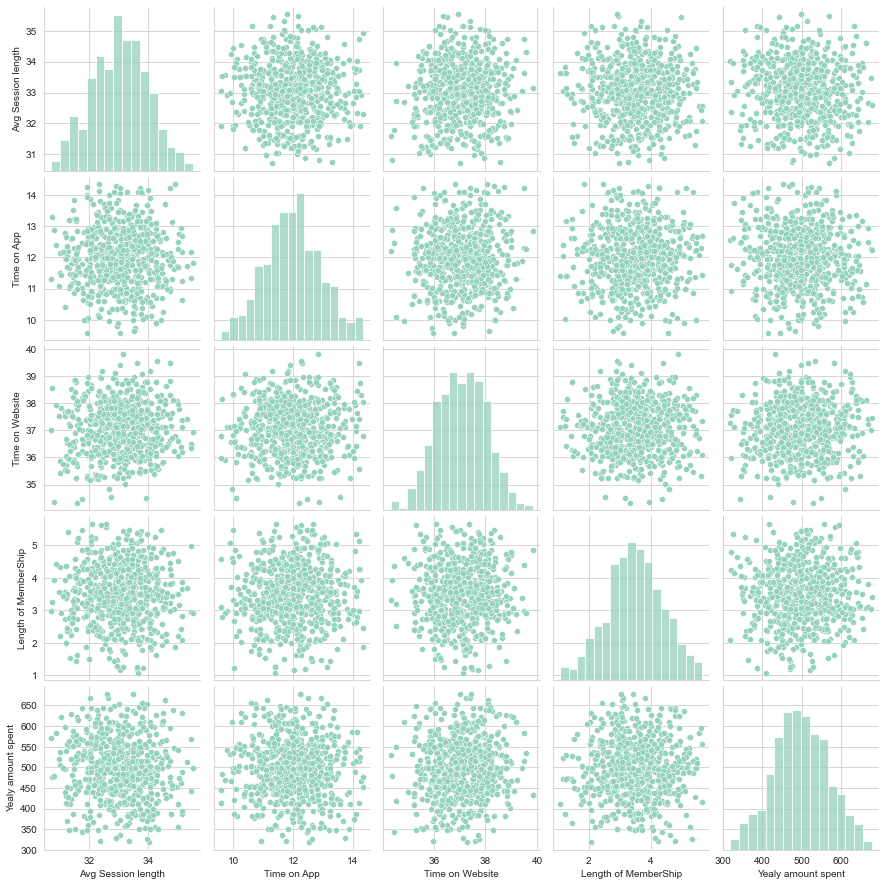

In [48]:
sns.pairplot(df_cleaned)

### Histogram 

In [49]:
df_cleaned.shape

(623, 5)

In [50]:
df_cleaned.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.040026,11.982722,37.079027,3.492591,497.511041
std,0.934798,0.944854,0.955622,0.903001,71.543546
min,30.716414,9.584761,34.327029,1.086759,318.000361
25%,32.376924,11.359736,36.381986,2.908187,450.436688
50%,33.044399,11.979827,37.113631,3.491124,497.809745
75%,33.695827,12.624978,37.769552,4.100700,546.869149
max,35.531879,14.336586,39.831896,5.659425,678.691520


<AxesSubplot:ylabel='Frequency'>

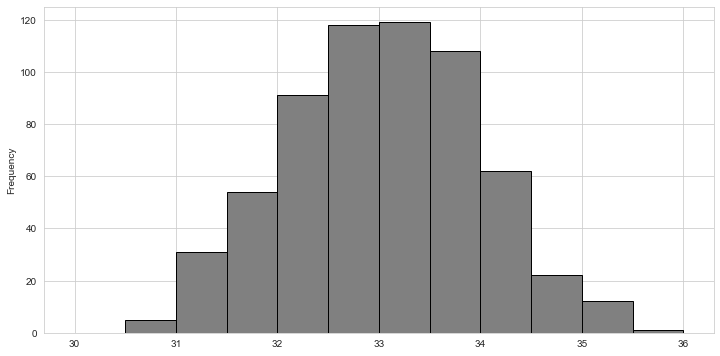

In [51]:
df_cleaned['Avg Session length'].plot(kind='hist', bins=[30,30.5, 31,31.5, 32,32.5, 33,33.5, 34,34.5, 35, 35.5, 36], figsize=(12,6), facecolor='grey',edgecolor='black')
#df_cleaned['Avg Session length'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

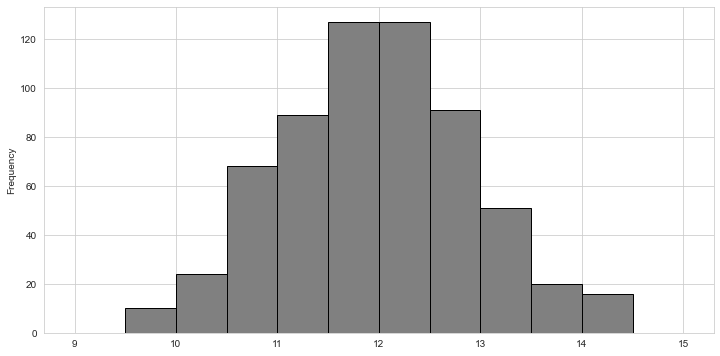

In [52]:
df_cleaned['Time on App'].plot(kind='hist', bins=[9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15], figsize=(12,6), facecolor='grey',edgecolor='black')
#df_cleaned['Time on App'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

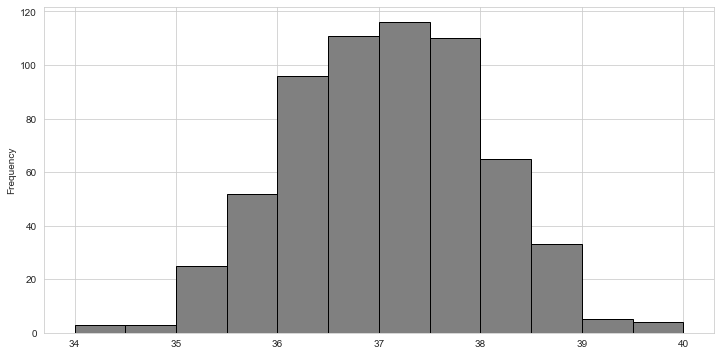

In [53]:
df_cleaned['Time on Website'].plot(kind='hist', bins=[34,34.5, 35, 35.5, 36,36.5,37,37.5,38,38.5,39,39.5,40], figsize=(12,6), facecolor='grey',edgecolor='black')
#df_cleaned['Time on Website'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

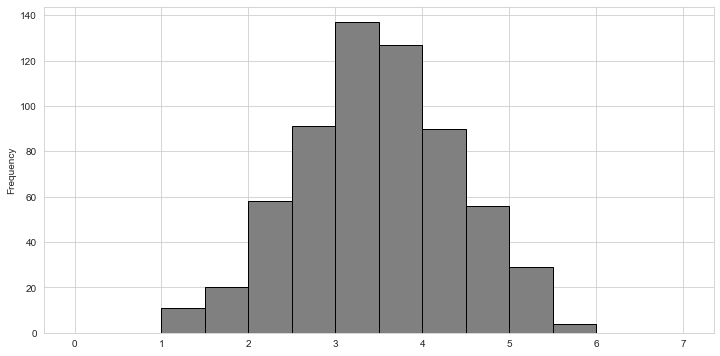

In [54]:
df_cleaned['Length of MemberShip'].plot(kind='hist', bins=[0,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7], figsize=(12,6), facecolor='grey',edgecolor='black')
#df_cleaned['Length of MemberShip'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

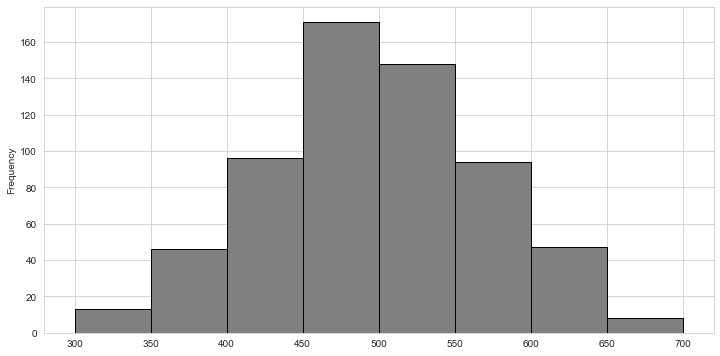

In [55]:
df_cleaned['Yealy amount spent'].plot(kind='hist', bins=[300,350,400,450,500,550,600,650,700], figsize=(12,6), facecolor='grey',edgecolor='black')
#df_cleaned['Yealy amount spent'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

### Create a linear model plot (using seaborn's lmplot) of Avg Session length vs Yearly Amount Spent 

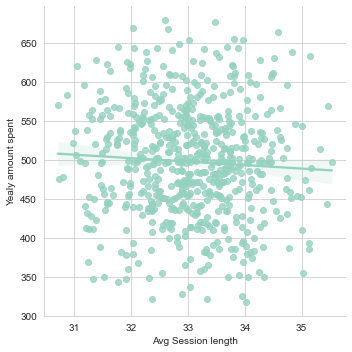

In [56]:
sns.lmplot(x = 'Avg Session length', y = 'Yealy amount spent', data = df_cleaned)

### Create a linear model plot (using seaborn's lmplot) of Time on App vs Yearly Amount Spent¶

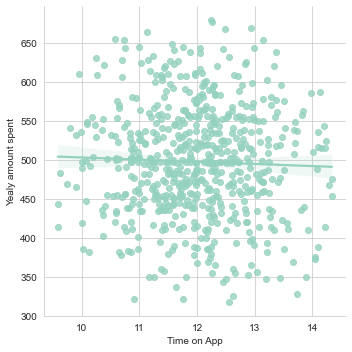

In [57]:
sns.lmplot(x = 'Time on App', y = 'Yealy amount spent', data = df_cleaned)

### Create a linear model plot (using seaborn's lmplot) of Time on Website vs Yearly Amount Spent¶

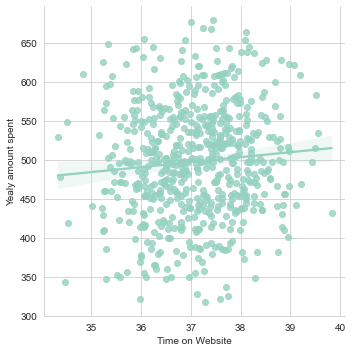

In [58]:
sns.lmplot(x = 'Time on Website', y = 'Yealy amount spent', data = df_cleaned)

### Create a linear model plot (using seaborn's lmplot) of  Length of Membership vs.Yearly Amount Spent.

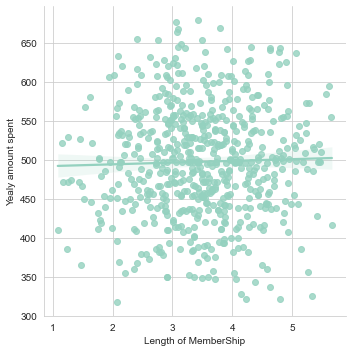

In [59]:
sns.lmplot(x = 'Length of MemberShip', y = 'Yealy amount spent', data = df_cleaned)

## Splitting the data set into training and testing dataset

In [60]:
#X = df_cleaned[['Avg Session length','Time on App','Time on Website','Length of MemberShip']]
#X.head()

In [61]:
df_cleaned=df_cleaned.rename({'Avg Session length':'ASL', 'Time on App':'ToA', 'Time on Website':'ToW',
       'Length of MemberShip':'LoM', 'Yealy amount spent':'YAS'},axis=1)
df_cleaned.head()

,ASL,ToA,ToW,LoM,YAS
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


In [62]:
X = df_cleaned[['ToW']]
X.head()

,ToW
0,35.850540
1,37.246443
2,36.610697
3,37.425695
4,36.856165


In [63]:
y = df_cleaned['YAS']
y.head()

0    576.098273
1    460.784955
2    349.739791
3    547.709921
4    487.055641
Name: YAS, dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [65]:
X_train

,ToW
29,37.846128
612,38.430567
528,38.865390
166,36.523247
386,38.411730
...,...
70,36.060789
132,37.106196
289,36.398145
109,35.941774


## Model Training

### We will be using LinearRegression from sklearn.linear_model

In [66]:
LRmodel=LinearRegression()
LRmodel.fit(X_train,y_train)
LRmodel.coef_
y_predict = LRmodel.predict(X_test)

In [67]:
print('MeanAbsoluteError:', 
      metrics.mean_absolute_error(y_test, y_predict), ' ',
      (1./len(y_test))*(sum(abs(y_test-y_predict))))
print('MeanSquaredError:', 
      metrics.mean_squared_error(y_test, y_predict), ' ',
      (1./len(y_test))*(sum((y_test-y_predict)**2)))
print('RootMeanSquaredError:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_predict)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-y_predict)**2))))

MeanAbsoluteError: 58.51741636110961   58.51741636110959
MeanSquaredError: 5112.544185200174   5112.544185200175
RootMeanSquaredError: 71.50205720956687   71.50205720956689


In [68]:
LRmodel=LinearRegression()
LRmodel.fit(X_train,y_train)
LRmodel.coef_
y_predict = LRmodel.predict(X_train)

In [69]:
print('MeanAbsoluteError:', 
      metrics.mean_absolute_error(y_train, y_predict), ' ',
      (1./len(y_train))*(sum(abs(y_train-y_predict))))
print('MeanSquaredError:', 
      metrics.mean_squared_error(y_train, y_predict), ' ',
      (1./len(y_train))*(sum((y_train-y_predict)**2)))
print('RootMeanSquaredError:', 
      np.sqrt(metrics.mean_squared_error(y_train, y_predict)), ' ',
      sqrt((1./len(y_train))*(sum((y_train-y_predict)**2))))

MeanAbsoluteError: 56.59117124328871   56.5911712432887
MeanSquaredError: 5058.818727874973   5058.818727874977
RootMeanSquaredError: 71.12537330569853   71.12537330569856


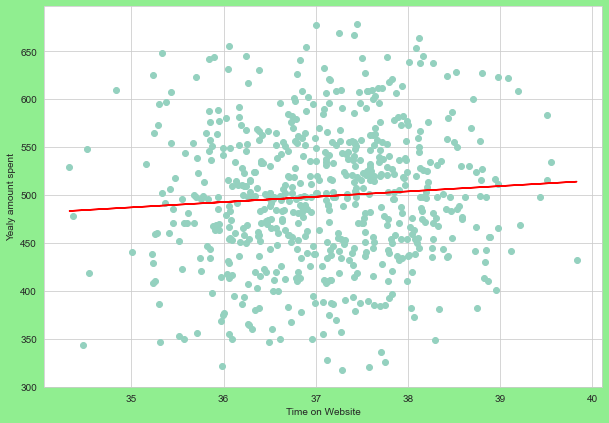

In [70]:
#y=mx+c

plt.figure(figsize=(10,7),facecolor="lightgreen")

plt.scatter(X,y,);
plt.plot(df_cleaned.ToW,X*LRmodel.coef_[0]+LRmodel.intercept_,color="red");

plt.xlabel("Time on Website");
plt.ylabel("Yealy amount spent")

plt.show()

In [ ]:
LRmodel.intercept_

## Model Testing

## Performance Evaluation of the Model

### Create a scatterplot of the test values vs. predicted values.

In [ ]:
plt.scatter(x = y_test, y = y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
y_test

In [ ]:
y_predict

In [ ]:
print('MeanAbsoluteError:', 
      metrics.mean_absolute_error(y_test, y_predict), ' ',
      (1./len(y_test))*(sum(abs(y_test-y_predict))))
print('MeanSquaredError:', 
      metrics.mean_squared_error(y_test, y_predict), ' ',
      (1./len(y_test))*(sum((y_test-y_predict)**2)))
print('RootMeanSquaredError:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_predict)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-y_predict)**2))))

## Residuals

### Plot a histogram of the residuals check distribution distributed

In [ ]:
sns.distplot((y_test-y_predict), bins = 50)

In [ ]:
df = pd.DataFrame( data = LRmodel.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.head()